<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

repositorio = fetch_olivetti_faces(data_home='datos', shuffle=True, random_state=121)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to datos


## Descripcion
fectch_olivetti_faces es otro dataset disponible sklearn para propositos de experimentacion.
Los parametros son:
- data_home: sitio local que trabaja como folder-cache que permite recuperar el repositorio de rostros desde ese sitio.
- shuffle: Si True, se reorganiza el dataset para evitar que las imagenes de los rostros  de una misma persona queden agrupados.

Retorna:
Un repositorio con las siguientes objetos:
- images: array(400, 64, 64). Cada fila corresponde a un rostro de un individuo de tamanio 64x64.

- data: array(400, 4096). Cada fila es una imagen de 64x64 convertida a u arreglo unidimensional.

- target: labels asociado a cada imagen del rostro.



### 2.  Análisis preliminar 

Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

Total dataset :
n_muestras: 400
n_features: 4096
Total Imagenes (400,)
Dimension Imagenes 64x64


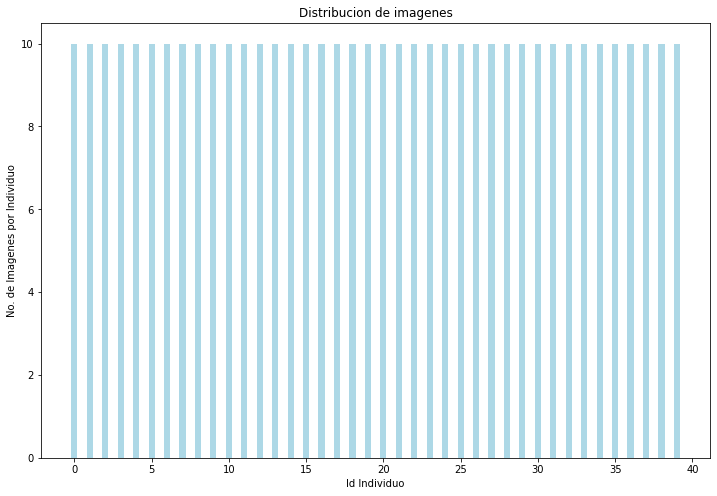

,count,mean,std,min,25%,50%,75%,max
0,400.0,0.400134,0.180695,0.086777,0.243802,0.392562,0.528926,0.805785
1,400.0,0.434236,0.189504,0.066116,0.267562,0.458678,0.575413,0.822314
2,400.0,0.476281,0.194742,0.090909,0.314050,0.512397,0.636364,0.871901
3,400.0,0.518481,0.193313,0.041322,0.383264,0.545455,0.666322,0.892562
4,400.0,0.554845,0.188593,0.107438,0.446281,0.584711,0.702479,0.871901
...,...,...,...,...,...,...,...,...
4091,400.0,0.338657,0.189256,0.012397,0.177686,0.314050,0.462810,0.863636
4092,400.0,0.335909,0.195280,0.049587,0.173554,0.299587,0.462810,0.921488
4093,400.0,0.321415,0.187842,0.057851,0.173554,0.289256,0.446281,0.929752
4094,400.0,0.313647,0.183616,0.061983,0.173554,0.270661,0.414256,0.884298


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
n_muestras, h, w = repositorio.images.shape
y = repositorio.target
X = repositorio.data
n_features = X.shape[1]
print("Total dataset :")
print("n_muestras: %d" % n_muestras)
print("n_features: %d" % n_features)
print(f'Total Imagenes {repositorio.target.shape}')
print(f"Dimension Imagenes {h}x{w}")

#Encontrar la distribucion de Images por individuo
unicos, conteo = np.unique(y, return_counts=True)
resultado = np.column_stack((unicos, conteo)) 
resultado.shape
fig = plt.figure(figsize = (12, 8))
plt.bar(resultado[:,0], resultado[:,1], color ='lightblue',
        width = 0.4)
plt.xlabel("Id Individuo")
plt.ylabel("No. de Imagenes por Individuo")
plt.title("Distribucion de imagenes")
plt.show()

#Estadisticas descriptivas de Features
df= pd.DataFrame(X)
df.describe().T


### Analisis

- Se tiene 400 muestras que corresponde a 400 images de rostros de diferentes individuos cuyo tamanio es 4096 (64x64). Estas imagenes son altamente dimensionales. En conclusion:  
n_muestras: 400   
n_features:  4096  
Total Imagenes: 400  
Dimension Imagenes 64x64

- Si vemos la distribucion de imagenes por individuo, hay 10 imagenes por individuo, lo que corresponde a un dataset perfectamente balanceado. Este balance es importante para cuando observemos la topologia de los cluster y concluir acerca de la bonda de ajuste de cada cluster.

- Al observar la desviacion estandar de los features(4096) , no hay marcadas diferencias en la escala de magnitud, y por ende podria usarse directamente en analisis PCA 

Como pudo notar en el punto anterior, las imágenes son altamente dimensionales. Antes de proceder con clustering reduzca a dos dimensiones las imágenes utilizando componentes principales. Grafique las dos primeras componentes y comente si se observa algún patron de agrupamiento.

(400, 4096)
(400, 2)
(2, 4096)


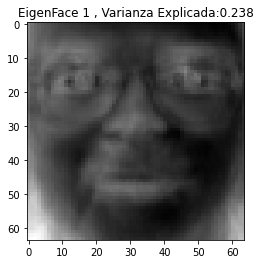

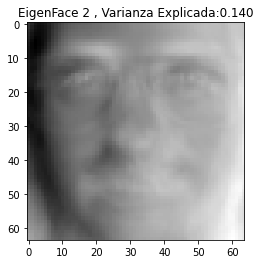

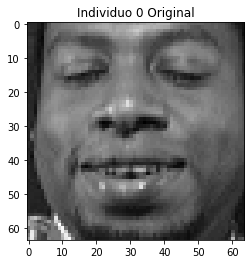

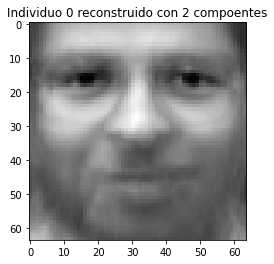

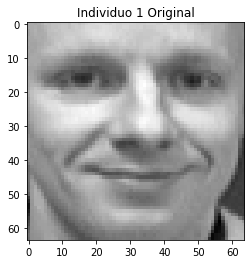

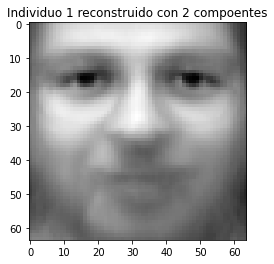

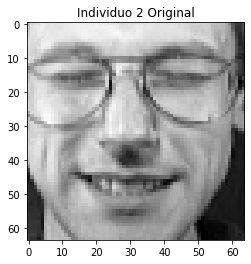

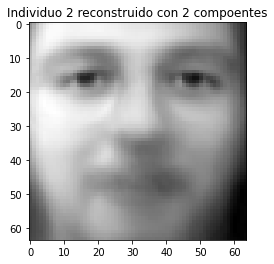

      count          mean       std       min       25%       50%       75%  \
0     400.0 -5.900860e-08  0.180695 -0.313358 -0.156333 -0.007572  0.128791   
1     400.0  1.430512e-07  0.189504 -0.368120 -0.166673  0.024442  0.141178   
2     400.0 -1.448393e-07  0.194742 -0.385372 -0.162232  0.036116  0.160082   
3     400.0 -2.074242e-07  0.193313 -0.477159 -0.135217  0.026973  0.147841   
4     400.0 -5.394220e-08  0.188593 -0.447407 -0.108564  0.029866  0.147634   
...     ...           ...       ...       ...       ...       ...       ...   
4091  400.0  9.298324e-08  0.189256 -0.326260 -0.160971 -0.024607  0.124153   
4092  400.0 -6.794929e-08  0.195280 -0.286322 -0.162355 -0.036322  0.126901   
4093  400.0  4.217029e-08  0.187842 -0.263564 -0.147862 -0.032159  0.124866   
4094  400.0 -4.023314e-08  0.183616 -0.251663 -0.140093 -0.042986  0.100609   
4095  400.0 -1.516938e-07  0.180635 -0.277397 -0.137934 -0.037727  0.106901   

           max  
0     0.405651  
1     0.388079  


In [ ]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px # Cargamos el paquete plotly para hacer gráficas interactivas.

# Funcion que usa plotly.express para anadir interactividad al plot
# Esta funcion plotea los nuevos componentes cargados en dataframe pcas
def plot_componentes(pcas, title):
    fig = px.scatter(pcas, x= 'CP1', y='CP2', color='target',
        text = 'target', title= title)
    fig.update_traces(textposition = 'top center',textfont_size=8)
    fig.show()

# Funcion para mostrar los eigenfaces
def plot_rostros(galeria_imagenes, labels,h, w,indices_mostrar):
    for index in indices_mostrar:
        plt.imshow(galeria_imagenes[index].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(labels[index], size=12)
        plt.show()

#MAIN: Aqui se empieza a ejecutar la seccion principal

# Se centran los rostros
X_centrado = X - X.mean(axis=0)
print(X_centrado.shape)

#Modelo PCA 
modelo_pca = decomposition.PCA(n_components=2)
modelo_pca.fit(X_centrado)
X_transformado= modelo_pca.transform(X_centrado)
print(X_transformado.shape)
print(modelo_pca.components_.shape)

#X_Transformado se carga en datframe para ser ploteado
pcas=pd.DataFrame(X_transformado,columns=['CP1','CP2'])
pcas['target']= y

#Mostrar Eigenfaces y su corrspondiemte varianza explicada
idx=[0,1]
total_varianza_explicada = np.sum(modelo_pca.explained_variance_ratio_)
labels=["EigenFace 1 , Varianza Explicada:{:.3f}".format(modelo_pca.explained_variance_ratio_[0]),
       "EigenFace 2 , Varianza Explicada:{:.3f}".format(modelo_pca.explained_variance_ratio_[1])]
plot_rostros (modelo_pca.components_,labels,h,w,idx)

#Reconstruccion de algunos rostros con solamente 2 compoentes
X_reconstruido_centrado=modelo_pca.inverse_transform(X_transformado)
X_reconstruido= X_reconstruido_centrado + X.mean(axis=0)
idx=[0]
labels=["Individuo 0 Original"]
plot_rostros (X,labels,h,w,idx)
labels=["Individuo 0 reconstruido con 2 compoentes"]
plot_rostros (X_reconstruido,labels,h,w,idx)
idx=[1]
labels=["","Individuo 1 Original"]
plot_rostros (X,labels,h,w,idx)
labels=["","Individuo 1 reconstruido con 2 compoentes"]
plot_rostros (X_reconstruido,labels,h,w,idx)
idx=[2]
labels=["","","Individuo 2 Original"]
plot_rostros (X,labels,h,w,idx)
labels=["","","Individuo 2 reconstruido con 2 compoentes"]
plot_rostros (X_reconstruido,labels,h,w,idx)


# plotear los componentes principales
plot_componentes(pcas, 'Ploteando Todas las observaciones')
for i in range(0,40,4):
  plot_componentes(pcas[(pcas.target== i) | (pcas.target== i+1) | (pcas.target== i+2) | (pcas.target== i+3)], 
                   "Ploteando grupos de individuos")




# Estadisticas descriptivas X_Centrado
df= pd.DataFrame(X_centrado)
print(df.describe().T)

# Estadisticas descriptivas X_Transformado
df= pd.DataFrame(X_transformado)
print(df.describe().T)





### Analisis
- Se obtiene el rostro promedio para ser restado del dataset de imagenes.  Esto hace que se obtenga un dataset de rostros que predomine las caracteristicas unicas de cada individuo.

- Este nuevo dataset( sin el rostro promedio) , se aplica a PCA con dos componentes. La varianza explicada de cada componentes es: 

| Componente      | Varianza explicada | Varianza acumulada explicada |
| ----------- | ----------- |----------- |
| 1      | 0.238       |0.238       |
| 2   | 0.14        |**0.378**      |

Por lo tanto, con esta retencion de varianza acumulada de solamente 0.378 de los pcas, la construccion de los cluster tendra algunos incovenientes por que todas las imagenes en el espacio nuevo seran muy similares, como se muestra en las caras reconstruidos de algunos personajes. Desde mi intuicion, los clusteres seran muy contiguos o algunos observaciones  quedaran en los cluster incorrectos. Esto lo veremos adelante mas para ver si mi sospecha esta en el camino correcto. 
- Al plotear todas las observaciones en el espacio vectorial de los componentes principales , se emplea plotly.express con el fin de poder tener las herramientas de PAN y Zoom y ver el comportamiento de cada individuo- si los puntos de un mismo individuo estan muy dispersos o estan equidistantes-.  Tambien, se adicionaron plots de a 4 individuos  para poder ver detallar la masa de puntos. Por ejemplo,  visualmente la masa de puntos de   individuo con label **1**, individuo con label **5**, individuo con label **10**,individuo con label **16**,individuo con label **20**,individuo con label **21**,individuo con label **31**, individuo con label **32**,individuo con label **35** y individuo con label **36**  son menos dispersas (con mayor densidad). </br> Los demas individuos, la masa de puntos tiene una forma mas elipsoidal y ésto podria afectar la conformacion de los clusters.



### 3. K-medias

Como sabemos que el dataset consta de 40 personas diferentes, utilice esta información para pedirle al algoritmo de K-medias que encuentre k=40 clusters. Explique brevemente que hace el algoritmo, comente sobre los resultados obtenidos y el desempeño del algoritmo. En su comentario incluya un gráfico que muestre qué imagenes pertenecen a cada cluster.

Tiempo de Execution: 0.1016685962677002 segundos
16
301.3157958984375
(40, 2)


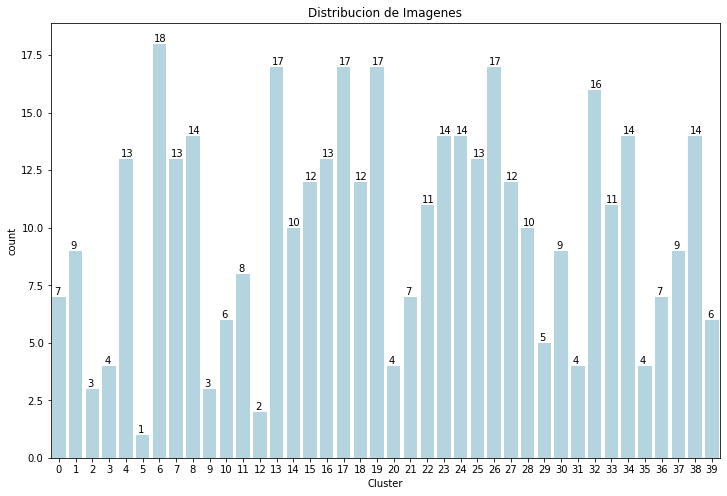

Tiempo de Execution: 0.213653564453125 segundos
10
271.8339538574219
(40, 2)


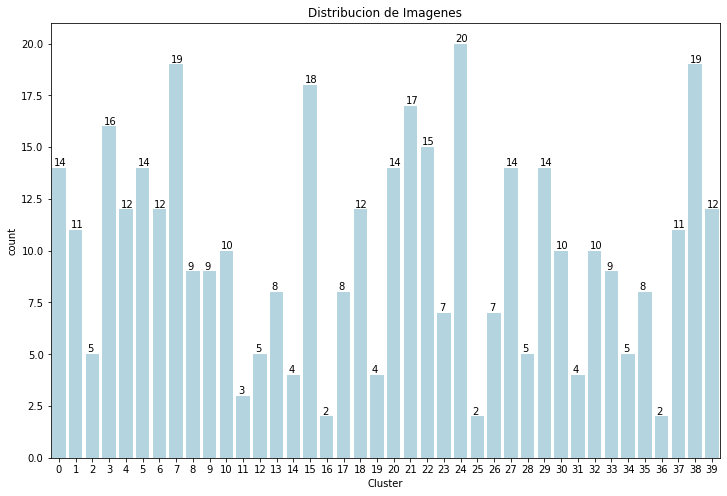

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px # Cargamos el paquete plotly para hacer gráficas interactivas.
import seaborn as sns
import matplotlib.pyplot as plt
 
# Funcion para mostrar centroides de los cluster y sus componentes
def plot_centroides_interactivos(X,target,centroides, titulo):
    centroides=pd.DataFrame(centroides,columns=['CP1','CP2'])
    xaxis = go.layout.XAxis(title="CP1")
    yaxis = go.layout.YAxis(title="CP2")
    fig_pcas = px.scatter(X, x= 'CP1', y='CP2', color='Cluster', text = target)
    fig_pcas.update_traces(textposition = 'top center',textfont_size=7)
    
    fig_cent = px.scatter(centroides, x= 'CP1', y='CP2',text=centroides.index, color_discrete_sequence=['cyan'])
    fig_cent.update_traces(marker={'size': 9})
    fig = go.Figure(layout=go.Layout(title=titulo, xaxis=xaxis, yaxis=yaxis),
                     data=fig_pcas.data + fig_cent.data )
    fig.show()

# Funcion para mostrar la distribucionde Imagenes
def distribucion_imagenes_por_cluster(df, columna_cluster, titulo='Distribucion de Imagenes'):
  plt.figure(figsize=(12,8))
  ax=sns.countplot(x =columna_cluster, data = df, color='lightblue')
  for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
  plt.title(titulo)
  plt.show()


#EXPERIMENTO 1: KMeans con seleccion inicial  de centroides randomica a partir de los datos
#               y con un numero de algoritmos =10 y escoge el de mejor Inercia  
import time
st = time.time()
kmeans= KMeans(n_clusters=40,init='random', n_init=10,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print('Tiempo de Execution:', time.time() - st, 'segundos')
print(kmeans.n_iter_)
print(kmeans.inertia_)
print(kmeans.cluster_centers_.shape)
 
plot_centroides_interactivos (X_clusterizado,y,kmeans.cluster_centers_, "Clusterizacion por KMeans(Inicializacion Randomica).Centroides Representados en CYAN")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster')

#EXPERIMENTO 2: KMeans con seleccion  de centroides KMeans++ en donde los cenrtroides iniciales son seleccionados 
#               usando muestreo basado en distrubcion probablistica  de la contribucion de los punto al total de inercia
#               y con un numero de algoritmos =10 y escoge el mejor Inercia  
import time
st = time.time()
kmeans= KMeans(n_clusters=40,init='k-means++', n_init=10,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print('Tiempo de Execution:', time.time() - st, 'segundos')
print(kmeans.n_iter_)
print(kmeans.inertia_)
print(kmeans.cluster_centers_.shape)
plot_centroides_interactivos (X_clusterizado,y,kmeans.cluster_centers_, "Clusterizacion por KMeans (Inicializacion KMeans++).Centroides Representados en CYAN")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster')

## Analisis

Para este ejercicio se llevo a cabo dos experimentos, en los cuales se analiza los centroides y la conformacion de los cluster teniendo como linea base la distribucion inicial de imagenes balanceada del punto 2. 

### Experimento 1
KMeans con seleccion inicial de centroides randomica a partir de los datos     y con un numero de algoritmos =10 , escogiendo el de mejor Inercia. Este tipo de escenario es configurado en el contructor de KMeans:   
*KMeans(n_clusters=40,init='random', n_init=10,random_state=121)*

Los resultados son:

| KMean       | Inercia | Tiempo Ejecucion |
| ----------- | ----------- |----------- |
| Inicializacion Centroides Randomica   | 301.315      |0.10 segundos       |

Los centroides de los clusters estan representadon en color CYAN y junto con la distribucion de observaciones de imagenes por cluster se observa que hay clusters con una conformacion muy desbalanceada de observaciones. Por ejemplo el cluster 5 solamente esta conformado por una observacion del individuo 7. En el ejercicio 2 , el individuo 7 pertenece a la masa de puntos elipsoidales (no tan densos) y de aqui se inferir  que es una de las causas de irregularidad  de la bondad de ajuste de los  clusters . Desde este punto de vista no hay coherencia en la conformacion de clusters. 

### Experimento 2
 KMeans con seleccion  de centroides KMeans++ en donde los centroides iniciales son seleccionados usando muestreo basado en distribucion probabilistica  de la contribucion de los puntos al total de inercia, y con un numero de algoritmos =10 el cual escoge el de mejor Inercia  . Este tipo de escenario es configurado en el contructor de KMeans:   
*KMeans(n_clusters=40,init='k-means++', n_init=10,random_state=121)*

Los resultados son:

| KMean       | Inercia | Tiempo Ejecucion |
| ----------- | ----------- |----------- |
| Inicializacion Centroides KMeans++   | 271.835      |0.21 segundos       |

La varianza intra-cluster es menor en Kmeans++ y respecto a la distribucion de imagenes por cluster todavia sigue siendo irregular pero un poco mejor que KMeans con seleccion inicial de centroides randomica. Igualmente  no hay coherencia en la conformacion de clusters. 


### 4. K-medoides

Repita el ejercicio anterior pero utilizando K-medoides. Explique brevemente qué hace el algoritmo, comente sobre los resultados obtenidos, y el desempeño del algoritmo. En su comentario incluya un gráfico que muestre qué imágenes pertenecen a cada cluster. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tiempo de Execucion: 0.02932143211364746 segundos
8
450.26788
(40, 2)


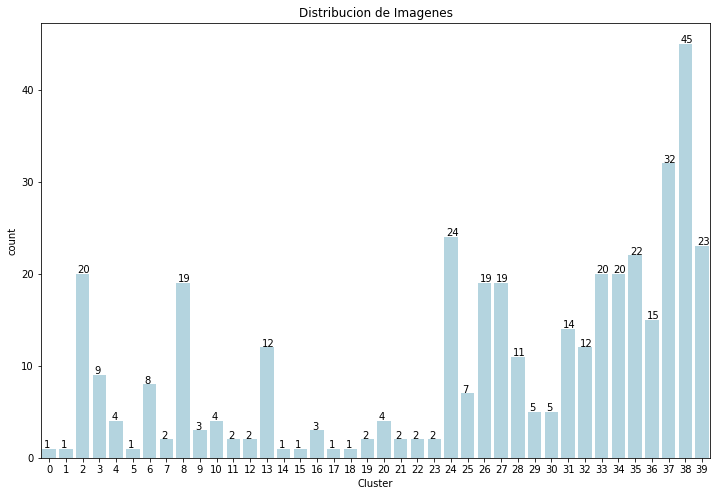

In [ ]:
# Utilice este espacio para escribir el código.
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import time
st = time.time()
kmedoides = KMedoids(n_clusters=40, random_state=121)
labels_clusters=kmedoides.fit_predict(X_transformado)
X_clusterizado_kmedoids = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado_kmedoids['Cluster'] = labels_clusters
et = time.time()
elapsed_time = et - st
print('Tiempo de Execucion:', elapsed_time, 'segundos')
print(kmedoides.n_iter_)
print(kmedoides.inertia_)
print(kmedoides.cluster_centers_.shape)

plot_centroides_interactivos (X_clusterizado_kmedoids,y,kmedoides.cluster_centers_,"Clusterizacion por KMedoides")
distribucion_imagenes_por_cluster(X_clusterizado_kmedoids,'Cluster')

## Analisis
- Se emplea la clase KMedoids de  la libreria sklearn-extra.
- Resultados:

| Inercia | Tiempo Ejecucion |
| ----------- |----------- |
| 450.278      |0.029 segundos       |

Al observar la distribucion de imagenes por cluster, hay una conformacion desbalanceada de las observaciones (incluso muchos clusters tienen solo una observacion), y visualmente veo que es mas dificil  distinguir los clusters porque la mayoria esta concentrada en la parte central del plot debido a la naturaleza del algoritmo (Distancia intercluster es menor). El score de inercia se deterioro comparado con los de KMeans. La naturaleza del modelo KMedoids esta basado en el grado de desimilaridad y como se dijo anteriormente, dada la eleccion de dos componentes principales , esto genera imagenes reconstruidas muy iguales y de aqui la explicacion del comportamiento no tan bueno   en este caso particular.

### 5. Comparación entre K-medias y K-medoides

Compare los clusters obtenidos entre K-medias y K-medoides. Explique las similitudes y diferencias, en su análisis comente sobre el desempeño de cada uno de los algoritmos.

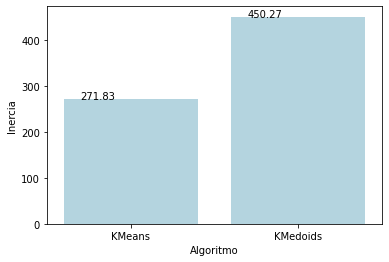

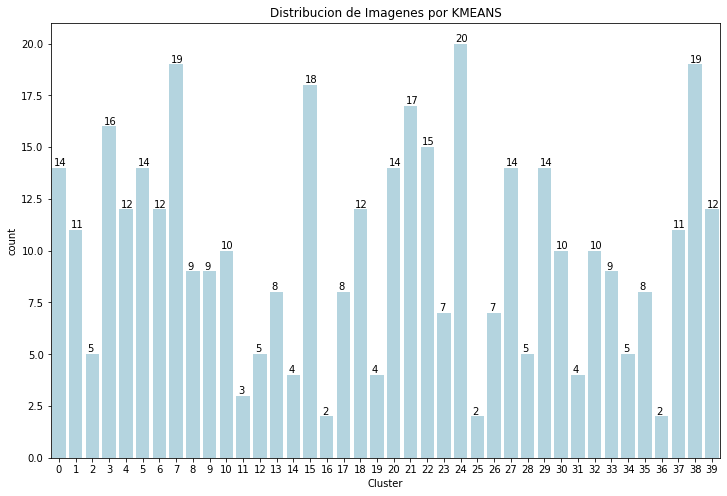

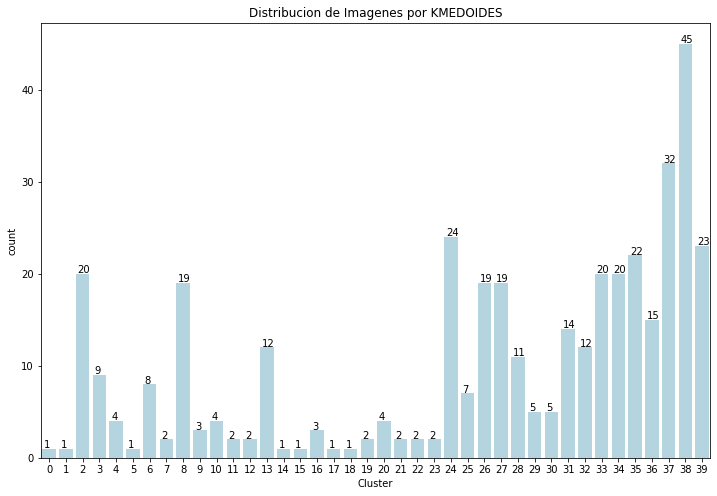

In [ ]:
valores= {'Algoritmo':['KMeans', 'KMedoids'],
          'Inercia':[kmeans.inertia_,kmedoides.inertia_]}
df= pd.DataFrame(valores)
ax=sns.barplot(x = 'Algoritmo',
            y = 'Inercia',
            data = df, color='lightblue')
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
# Show the plot
plt.show()


distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes por KMEANS')
distribucion_imagenes_por_cluster(X_clusterizado_kmedoids,'Cluster','Distribucion de Imagenes por KMEDOIDES')

## Analisis

- Al observar la distribucion de imagenes por cluster, hay una conformacion desbalanceada de las observaciones en todos los algoritmos , pero en Kmedoids es mucho mas desbalanceada que los KMeans. Esto es confirmado en el score de inercia que es superior a los Kmeans.

| Algortitmo       | KMean       | Inercia | Tiempo Ejecucion |
| ----------- | ----------- | ----------- |----------- |
| Kmeans| Inicializacion Centroides Randomica   | 301.315      |0.081 segundos       |
| Kmeans| Inicializacion Centroides KMeans++   | 271.835      |0.617 segundos       |
| KMedoids | |  450.278      |0.022 segundos       |

- La localizacion de los medoides es mayoritariamente mas densa en el centro del plot en contraste de los centroides de los KMeans que se hayan distribuidos en el plot. Esto se traduce en que la distancia intercluster entre medoides es menor comparaddo con la distancia intercluster de los centroides de  KMeans.
- Podria inferir que este comportamiento tan irregular se debe a que seleccionamos solamente 2 componentes principales que retienen solamente **0.378** de la varianza explicada. Aqui se confirma mi intuicion inicial de la "dificultad de tener clusters completamente distinguibles y regulares".


### 6. Elección del número de clusters

En los puntos anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios que discutimos en los cuadernos teóricos. Explique brevemente en qué consiste cada criterio y aplíquelos para ambos métodos. Compare los resultados obtenidos.



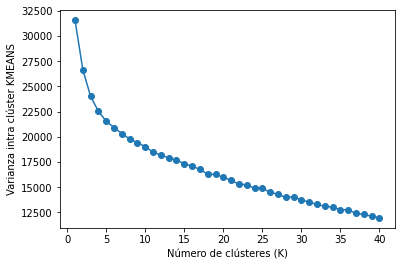

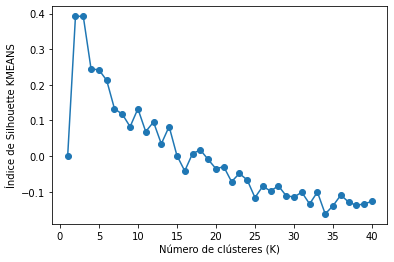

Numero de Clustter donde se maximiza score  silhouettes: 2
 Score silhouettes KMEANS [0, 0.3925686, 0.39226264, 0.24427368, 0.24233173, 0.21252133, 0.13275534, 0.11768198, 0.08247407, 0.13273466, 0.068743914, 0.0955288, 0.03431513, 0.08293999, 0.0015626901, -0.041721508, 0.006899261, 0.017256066, -0.009499836, -0.035636038, -0.02970255, -0.07193756, -0.048856393, -0.06687055, -0.11654578, -0.084781684, -0.09814678, -0.083500825, -0.11157593, -0.11485103, -0.1015666, -0.13433152, -0.1010668, -0.16239852, -0.139512, -0.10946326, -0.12917446, -0.1384024, -0.13405874, -0.12709813]


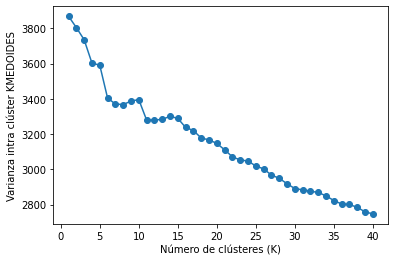

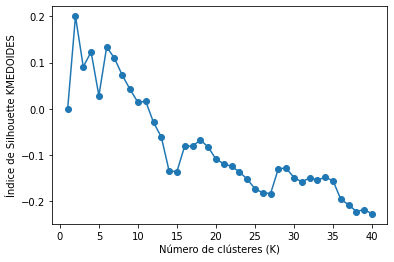

Numero de Clustter donde se maximiza score  silhouettes KMEDOIDES : 2
 Score silhouettes KMEDOIDES [0, 0.20043918, 0.090870626, 0.12321061, 0.028475683, 0.13396865, 0.10931734, 0.07268738, 0.041987147, 0.014016238, 0.016287796, -0.029341545, -0.06112424, -0.13469158, -0.13592836, -0.08022081, -0.08116579, -0.067406744, -0.08261346, -0.109091304, -0.11885624, -0.124521084, -0.13666078, -0.15204309, -0.1731781, -0.1818007, -0.1835833, -0.12939236, -0.12864473, -0.14873411, -0.15832224, -0.14966694, -0.15391923, -0.14849363, -0.15561035, -0.19595657, -0.20778023, -0.22235985, -0.21800205, -0.22756284]
13
Inercia KMeans 2 Cluster 7080.9716796875
(2, 2)


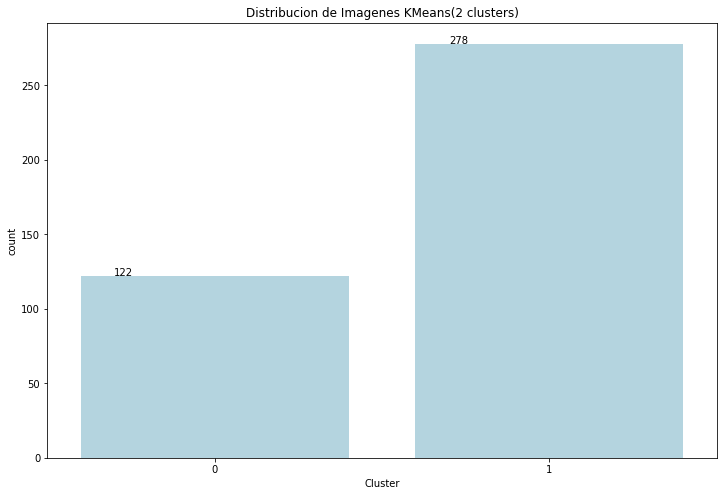

3
Inercia KMedoids 2 Cluster 1542.984619140625
(2, 2)


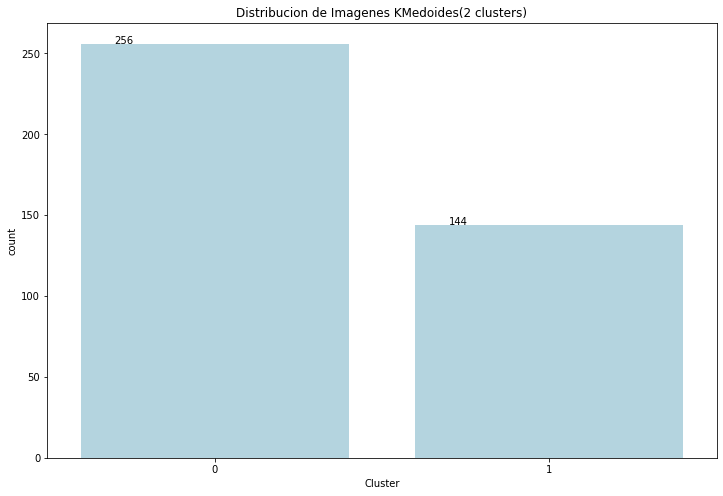

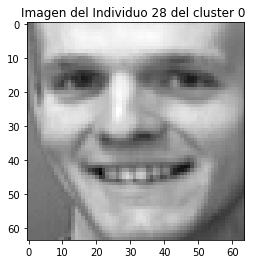

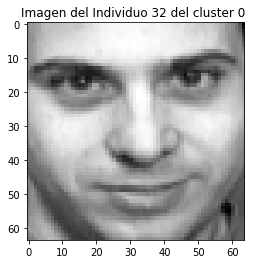

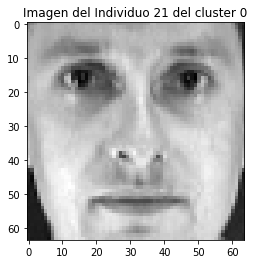

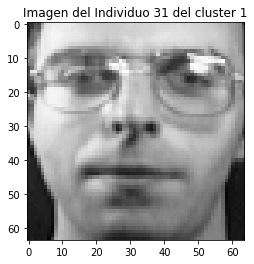

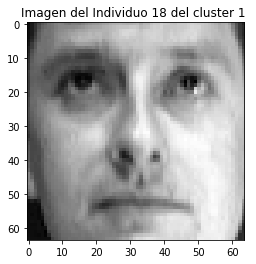

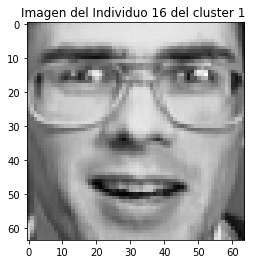

In [ ]:
from sklearn.metrics import silhouette_score

#Ejercicio 1:KMEANS
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 41): # Evaluamos entre 1 a 401 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 121).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X_transformado, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

plt.plot(range(1, 41), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster KMEANS')
plt.show()

plt.plot(range(1, 41), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette KMEANS')
plt.show()
print(f'Numero de Clustter donde se maximiza score  silhouettes: {silhouettes.index(max(silhouettes)) + 1}')
print(f' Score silhouettes KMEANS {silhouettes}')

#Ejericicio 2: KMEIDOES

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 41): # Evaluamos entre 1 a 401 clusters posibles
    kmeidodes = KMedoids(n_clusters = k, random_state = 121).fit(X)
    varianza_intra_cluster.append(kmeidodes.inertia_)
    try:
        silhouette = silhouette_score(X_transformado, kmeidodes.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

plt.plot(range(1, 41), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster KMEDOIDES')
plt.show()

plt.plot(range(1, 41), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette KMEDOIDES')
plt.show()
print(f'Numero de Clustter donde se maximiza score  silhouettes KMEDOIDES : {silhouettes.index(max(silhouettes)) + 1}')
print(f' Score silhouettes KMEDOIDES {silhouettes}')


kmeans= KMeans(n_clusters=2,init='k-means++', n_init=10,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(kmeans.n_iter_)
print(f'Inercia KMeans 2 Cluster {kmeans.inertia_}')
print(kmeans.cluster_centers_.shape)
plot_centroides_interactivos (X_clusterizado,y,kmeans.cluster_centers_, "Clusterizacion por KMeans(2 clusters).Centroides Representados en CYAN")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster', 'Distribucion de Imagenes KMeans(2 clusters)')


kmedoids= KMedoids(n_clusters=2,random_state=121)
labels_clusters=kmedoids.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(kmedoids.n_iter_)
print(f'Inercia KMedoids 2 Cluster {kmedoids.inertia_}')
print(kmedoids.cluster_centers_.shape)
plot_centroides_interactivos (X_clusterizado,y,kmedoids.cluster_centers_, "Clusterizacion por KMedoides(2 clusters).Centroides Representados en CYAN")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes KMedoides(2 clusters)')


#Algunas images de cluster 0 tanto en KMEANS com KMEDOIDES
plt.title('Imagen del Individuo 28 del cluster 0 ')
plt.imshow(X[28].reshape((h, w)), cmap=plt.cm.gray)
plt.show()
plt.title('Imagen del Individuo 32 del cluster 0 ')
plt.imshow(X[32].reshape((h, w)), cmap=plt.cm.gray)
plt.show()
plt.title('Imagen del Individuo 21 del cluster 0')
plt.imshow(X[21].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

#Algunas images de cluster 1 tanto en KMEANS com KMEDOIDES
plt.title('Imagen del Individuo 31 del cluster 1')
plt.imshow(X[31].reshape((h, w)), cmap=plt.cm.gray)
plt.show()
plt.title('Imagen del Individuo 18 del cluster 1 ')
plt.imshow(X[18].reshape((h, w)), cmap=plt.cm.gray)
plt.show()
plt.title('Imagen del Individuo 16 del cluster 1 ')
plt.imshow(X[16].reshape((h, w)), cmap=plt.cm.gray)
plt.show()


## Analisis

- A traves del diagrama Elbow se puede visualizar el numero de cluster optimo es:

| Algoritmo       | Numero de cluster optimo      | 
| ----------- | ----------- | 
| Kmeans| 2   | 
| KMedoides| 4  | 

- Mediante el score de silhouette:

| Algoritmo       | Numero de cluster optimo      | 
| ----------- | ----------- | 
| Kmeans| 2   | 
| KMedoides| 2  | 

## Intepretacion Indices silhouette
El maximo de los scores de silhouette son cercanos a 0 lo cual significa que los clusteres son contiguos y sus distancia no es sgnificativa. A partir del cluster 9, los scores son negativos indicando que empieza a tener hay una incorrecta clusterizacion de los puntos.

### Corriendo ambos modelos con 2 clusters

Se vuelve a correr ambos modelos con 2 clusters y se obtiene la siguiente inercia:

| Algoritmo       | Inercia     | 
| ----------- | ----------- | 
| Kmeans|7080.97   | 
| KMedoides| 1542.98  | 

- Segun la distribucion de las imagenes por cluster se tiene para ambos modelos una tamanio diferente para cada cluster.


- Se muestran algunas imagenes que componen los cluster 0 y 1 de ambos modelos para ver si se puede detectar el criterio para agrupar en dos clusters. A simple vista se observa que los de cluster 0 tienen ciertas caracteristicas mas fuertes en los estructura de la parte de los ojos. (esto es simplemente una inferencia producto de las fotos)




### 7. Robustez de los resultados

#### 7.1 Estandarice los datos y repita los puntos 3, 4, y 5. ¿Hubo alguna mejora en la conformación de los clusters? 

varianza_intra_cluster 40 CENTROIDES EXP1:13718.3037109375


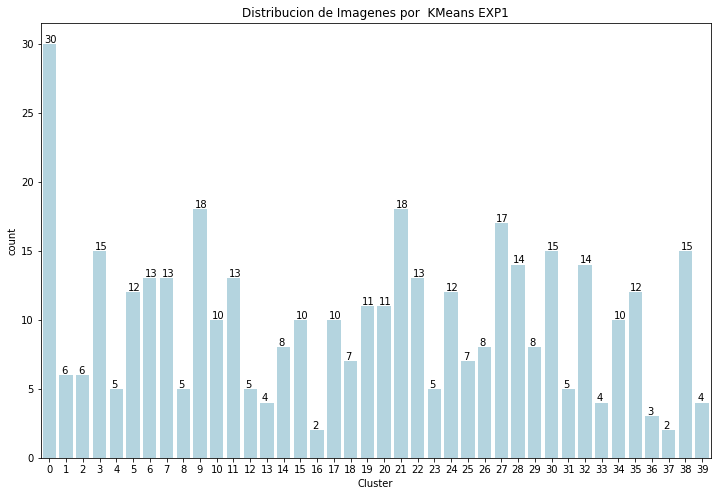

varianza_intra_cluster 40 MEDOIDES EXP1:3343.15087890625


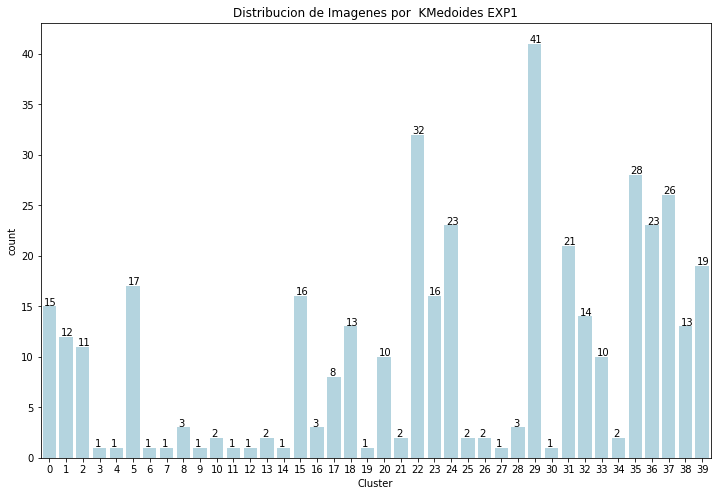

varianza_intra_cluster 40 CENTROIDES EXP2:18.645263671875


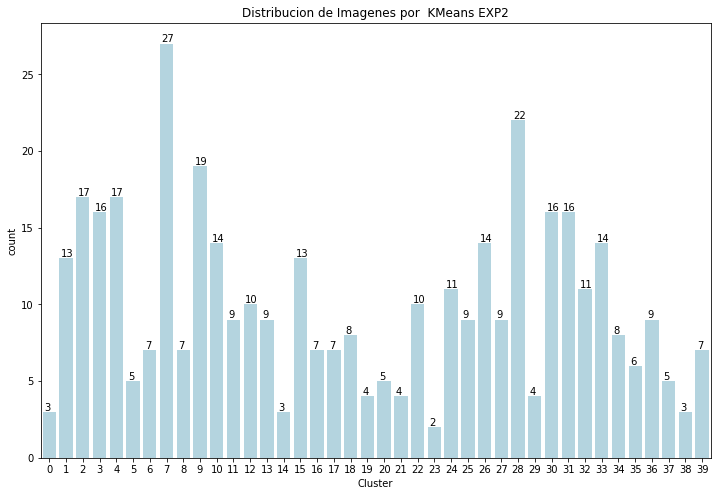

varianza_intra_cluster 40 MEDOIDES EXP2:120.99029541015625


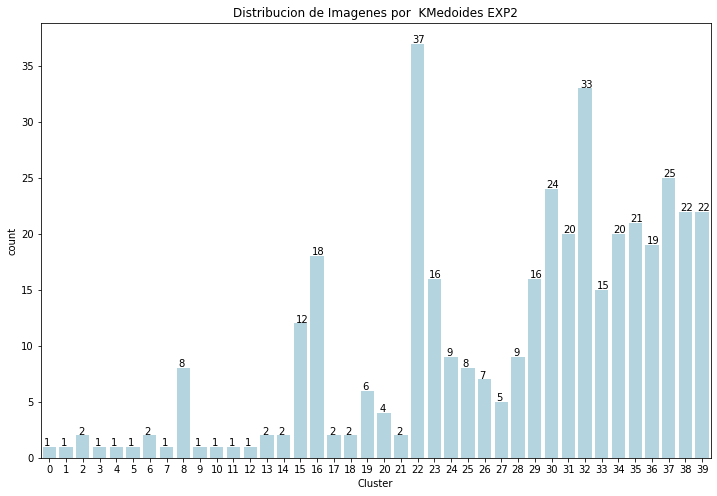

In [ ]:
from sklearn.preprocessing import  StandardScaler

#EXPERIMENTO 1 : Estandarizado antes de los componentes

#Solamente una estandarizacion antes de PCA
escalar= StandardScaler()
X_escalado= escalar.fit_transform(X)

#Modelo PCA
modelo_pca = decomposition.PCA(n_components=2)
modelo_pca.fit(X_escalado)
X_transformado= modelo_pca.transform(X_escalado)

#Clusterizacion por KMeans
kmeans= KMeans(n_clusters=40,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(f'varianza_intra_cluster 40 CENTROIDES EXP1:{kmeans.inertia_}')
plot_centroides_interactivos (X_clusterizado,y,kmeans.cluster_centers_, "Clusterizacion por KMeans EXP1 ")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes por  KMeans EXP1')

#Clusterixacion por KMedoides
from sklearn_extra.cluster import KMedoids
kmedoides = KMedoids(n_clusters=40, random_state=121)
labels_clusters=kmedoides.fit_predict(X_transformado)
labels_clusters
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(f'varianza_intra_cluster 40 MEDOIDES EXP1:{kmedoides.inertia_}')
plot_centroides_interactivos (X_clusterizado,y,kmedoides.cluster_centers_,"Clusterizacion por KMedoides EXP1")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes por  KMedoides EXP1')


#EXPERIMENTO 2 : Estandarizado antes de los componentes principales y despues de obtener los componentes volvemos aplicar estandarizacion  
#

# estandarizacion antes de PCA
escalar= StandardScaler()
X_escalado= escalar.fit_transform(X)

#Modelo PCA
modelo_pca = decomposition.PCA(n_components=2)
modelo_pca.fit(X_escalado)
X_transformado= modelo_pca.transform(X_escalado)

# Segunda estandarizacion despues de PCA para volver desviacion standard a 1 
escalar= StandardScaler()
X_transformado= escalar.fit_transform(X_transformado)


#Clusterixacion por KMeans
kmeans= KMeans(n_clusters=40,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado)
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(f'varianza_intra_cluster 40 CENTROIDES EXP2:{kmeans.inertia_}')
plot_centroides_interactivos (X_clusterizado,y,kmeans.cluster_centers_, "Clusterizacion por KMeans EXP2")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes por  KMeans EXP2')

#Clusterixacion por KMedoides
from sklearn_extra.cluster import KMedoids
kmedoides = KMedoids(n_clusters=40, random_state=121)
labels_clusters=kmedoides.fit_predict(X_transformado)
labels_clusters
X_clusterizado = pd.DataFrame(X_transformado, columns=['CP1', 'CP2'])
X_clusterizado['Cluster'] = labels_clusters
print(f'varianza_intra_cluster 40 MEDOIDES EXP2:{kmedoides.inertia_}')
plot_centroides_interactivos (X_clusterizado,y,kmedoides.cluster_centers_,"Clusterizacion por KMedoides EXP2")
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Imagenes por  KMedoides EXP2')




## Analisis

Se corren dos experimentos:

### Experimento 1:

- El pipeline del modelo es el siguiente:</BR> *Estandarizacion Dataset->PCA->Clusterizacion*

| Algoritmo       | Inercia     | 
| ----------- | ----------- | 
| Kmeans|13718.30   | 
| KMedoides|3343.15  | 

### Experimento 2:

- El pipeline del modelo es el siguiente: </BR>*Estandarizacion Dataset->PCA->Estandarizacion Componentes->Clusterizacion*

| Algoritmo       | Inercia     | 
| ----------- | ----------- | 
| Kmeans|18.64 | 
| KMedoides|120.99  | 


En ambos experimentos hubo cambio de magnitud de las varianzas intraclusterales (inercia) pero la toplogia del cluster es la misma. Quizas no se mejora la conformacion de los cluster  es porque el problema no es de la clusterizacion sino de la escogencia del numero de componentes principales los cuales retuvieron solamente el 37.8%.


#### 7.2 ¿Es necesario realizar la descomposición en componentes principales antes de la clusterización? Comente sobre la presición de los resultados y compare el tiempo que tardan K-medias y K-medoides  con y sin la reducción de dimensionalidad.

varianza_intra_cluster 40 CENTROIDES SIN PCA :603111.375
Tiempo de Excution KMeans: 9.336062908172607 seconds


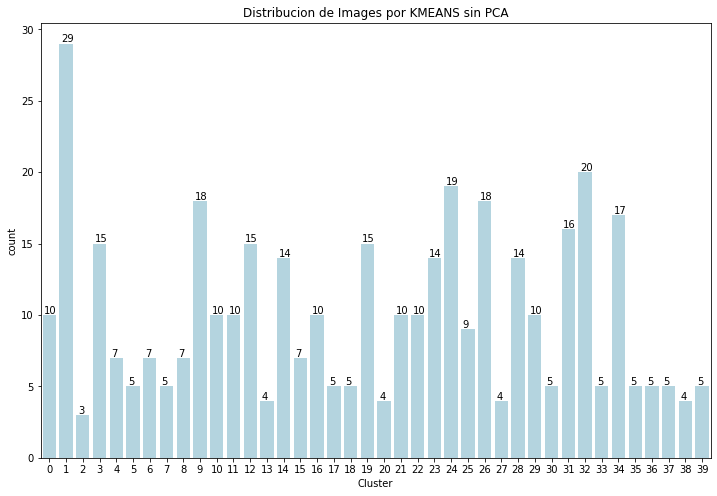

varianza_intra_cluster 40 MEDOIDES SIN PCA :19575.150390625
Tiempo de Excution KMedoides : 0.0984809398651123 seconds


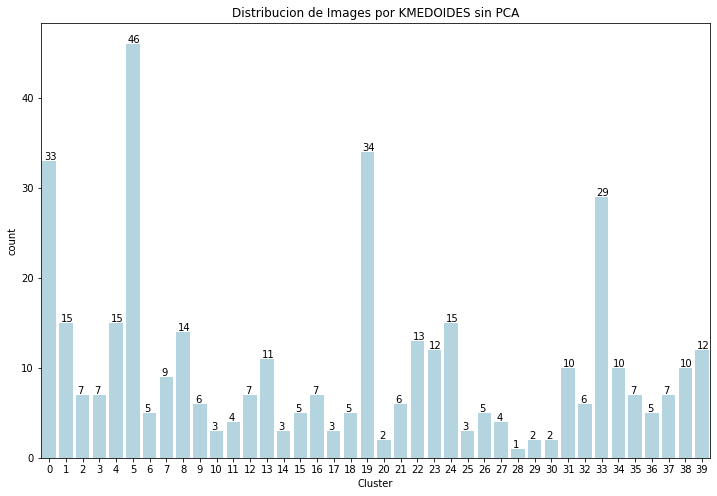

varianza_intra_cluster 40 CENTROIDES CON PCA 95%:527303.5
Tiempo de Excution KMeans: 0.6057045459747314 seconds


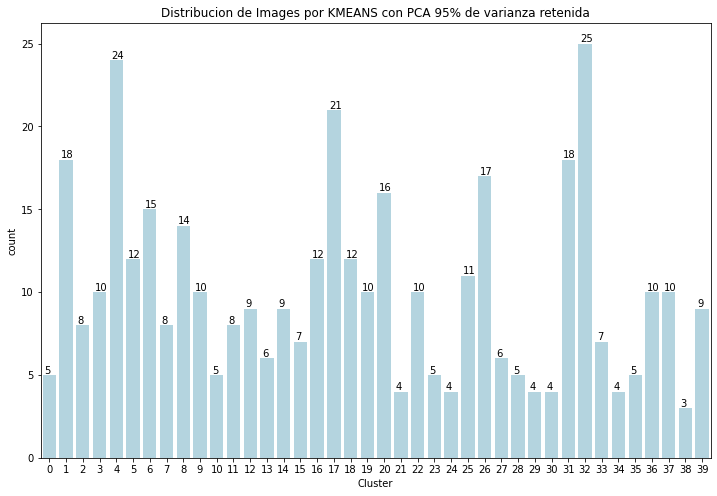

In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
import time


escalar= StandardScaler()
X_escalado= escalar.fit_transform(X)

#Kmeans sin reduccion de diensionalidad
st = time.time()
kmeans= KMeans(n_clusters=40,random_state=121)
labels_clusters=kmeans.fit_predict(X_escalado)
print(f'varianza_intra_cluster 40 CENTROIDES SIN PCA :{kmeans.inertia_}')
X_clusterizado = pd.DataFrame(X_escalado)
X_clusterizado['Cluster'] = labels_clusters
et = time.time()
elapsed_time = et - st
print('Tiempo de Excution KMeans:', elapsed_time, 'seconds')
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster', 'Distribucion de Images por KMEANS sin PCA')
st = time.time()

#Kmedoides sin reduccion de diensionalidad
kmedoides = KMedoids(n_clusters=40, random_state=121)
labels_clusters=kmedoides.fit_predict(X_escalado)
print(f'varianza_intra_cluster 40 MEDOIDES SIN PCA :{kmedoides.inertia_}')
X_clusterizado = pd.DataFrame(X_escalado)
X_clusterizado['Cluster'] = labels_clusters
et = time.time()
elapsed_time = et - st
print('Tiempo de Excution KMedoides :', elapsed_time, 'seconds')
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster','Distribucion de Images por KMEDOIDES sin PCA')


#Ejericicio con PCA reteniendo 95 % de varianza
modelo_pca = decomposition.PCA(n_components=0.95)
modelo_pca.fit(X_escalado)
X_transformado1= modelo_pca.transform(X_escalado)
st = time.time()
kmeans= KMeans(n_clusters=40,random_state=121)
labels_clusters=kmeans.fit_predict(X_transformado1)
print(f'varianza_intra_cluster 40 CENTROIDES CON PCA 95%:{kmeans.inertia_}')
X_clusterizado = pd.DataFrame(X_transformado1)
X_clusterizado['Cluster'] = labels_clusters
et = time.time()
elapsed_time = et - st
print('Tiempo de Excution KMeans:', elapsed_time, 'seconds')
distribucion_imagenes_por_cluster(X_clusterizado,'Cluster', 'Distribucion de Images por KMEANS con PCA 95% de varianza retenida')

## ANALISIS 

Los resultados de tiempo de ejecucion son:

| Algoritmo       |Reduccion de Dimensionalidad| Tiempo Ejecucion(segundos)      | 
| ----------- | ----------- | ----------- |
| Kmeans| Si  | 0.21  | 
| KMedoides| Si  | 0.02 | 
| Kmeans| No  | 9.3 | 
| KMedoides| No  | 0.09  | 

El analisis de PCA ayuda a reducir la complejidad de la computacion tambien.

Tambien,con todos los 4096 features, se obtiene una mejor clusterizacion en la distribucion de imagenes  .

## CONCLUSION

- En este taller, solamente se retuvo dos componentes que representaban solamente 37.8%. Deberia haberse retenido al menos una varianza de 95% en la seleccion de los compoentes antes de aplicar clusterizacion. Este ejercicio de PCA con 95% antes de la clusterizacion se ejecuto y se comprueba que la distribucion de imagenes es mejor, similar a de correr el modelo sin reduccion de dimensionalidad (4096 features).

- Haciendo PCA, se retiene las mas importante informacion y si los datos exhiben algun nivel de clusterizacion, esto sera revelado despues del analisis PCA. Entonces, reteniendo componentes con las mas alta varianza acumulada, los clusters seran probablemente mas visibles.

- Aplicar Kmeans o Kmedoides depende del contexto del problema y si los outliers representan un cluster distinto o no en un dominio de problema especifico.
